In [1]:
import sklearn

In [2]:
n_features=5

In [3]:
intensity=['high','mid_high','mid','low_mid','low']
signals=['red','green','orange']
duration_of_signal=[0,1]#0 for correct, 1 for more time

In [4]:
import pandas as pd

In [5]:
df=pd.DataFrame(columns=['intensity','signals','extra_time'])

In [6]:
import random

In [7]:
for i in range(100):
    inten=random.choice(intensity)
    extraTime=0
    if inten == 'high' or inten=='low':
        extraTime=1
    else:
        extraTime=0
    sig=random.choice(signals)
    df.loc[len(df),:]=(inten,sig,extraTime)

In [8]:
df

,intensity,signals,extra_time
0,mid,green,0
1,high,green,1
2,high,red,1
3,high,orange,1
4,mid,red,0
...,...,...,...
95,mid,green,0
96,mid_high,green,0
97,low,orange,1
98,mid_high,red,0


In [9]:
from sklearn.preprocessing import LabelEncoder as LE

In [11]:
le=LE()
inten=le.fit_transform(df['intensity'])

In [13]:
le_s=LE()
sign=le_s.fit_transform(df['signals'])

In [15]:
df['intensity']=inten
df['signals']=sign

In [16]:
df

,intensity,signals,extra_time
0,3,0,0
1,0,0,1
2,0,2,1
3,0,1,1
4,3,2,0
...,...,...,...
95,3,0,0
96,4,0,0
97,1,1,1
98,4,2,0


In [17]:
import seaborn as sns

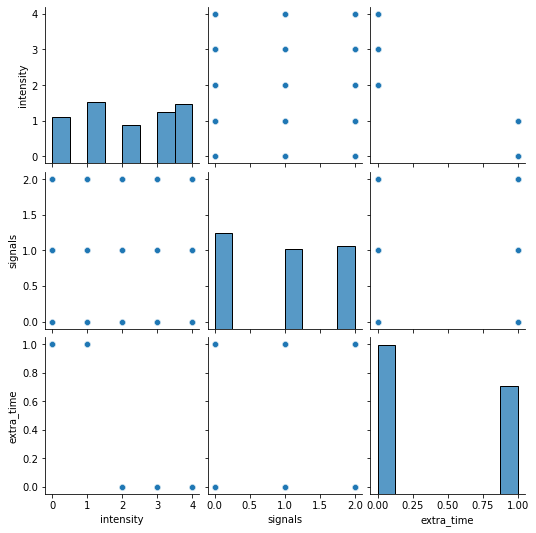

In [18]:
sns.pairplot(df)

In [20]:
from sklearn.tree import DecisionTreeClassifier as dTC

In [21]:
dtc=dTC()

In [28]:
train=df[['intensity','signals']]
test=df['extra_time']

In [65]:
test.values.tolist()

[0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1]

In [66]:
dtc.fit(train.values.tolist(),test.values.tolist())

DecisionTreeClassifier()

In [78]:
train.values[0]

array([3, 0])

In [81]:
dtc.predict([train.values[0]])

array([0])

In [83]:
def predict(model, inps):
    return model.predict([inps])

In [88]:
predict(dtc, train.values[4])

array([0])

In [89]:
import pickle
d=pickle.dumps(dtc)

In [91]:
from joblib import dump
dump(d,'traffic.joblib')

['traffic.joblib']